# Bain Advanced Analytics - Watershed Challenge

## Lucas Santiago Gandin | Advanced Analytics Candidate

### Purpose and Context
- This code will analyze extreme water flux in Chile and build a model to predict next day future extreme flux (and probability) for each watershed
- It is pre estabilished that max temperature, flux and precipitation can only be measured correctly at the end of each day
- Extreme conditions will be defined by historical data

### Summary
01. Intro
02. Cockpit
03. Data Manipulation
04. Data Exploration
05. Feature Selection
06. Model
07. Final Considerations

### Postscript (Read before running this code)
- Pycaret until 2022-07-04 would not run properly in the most updated version of scikit-learn, therefore downgrade it to 0.23.2
- This code was built in Python version 3.6.13
- Before running the code, check if all the libraries are installed in the chapter "01. Intro"
- Check which switches are on in the chapter "02. Cockpit" - if it is your first time running the code, you may like to turn all of them on

### Contact
 - Lucas Santiago Gandin
 - (11) 99686-6597
 - https://www.linkedin.com/in/lucas-gandin

### 00. INSTALATION

Consider installing the following versions of as requirements with a txt file to run the code

In [1]:
pip freeze

adal==1.2.7
alembic==1.7.7
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
async-generator==1.10
attrs==21.4.0
azure-common==1.1.26
azure-core==1.11.0
azure-graphrbac==0.61.1
azure-identity==1.4.1
azure-mgmt-authorization==0.61.0
azure-mgmt-containerregistry==2.8.0
azure-mgmt-core==1.2.2
azure-mgmt-keyvault==2.2.0
azure-mgmt-resource==12.1.0
azure-mgmt-storage==11.2.0
azure-nspkg==3.0.2
azure-storage-blob==0.37.1
azure-storage-common==0.37.1
azure-storage-nspkg==3.1.0
azureml==0.2.7
azureml-core==1.23.0
azureml-dataprep==2.10.1
azureml-dataprep-native==30.0.0
azureml-dataprep-rslex==1.8.1
azureml-dataset-runtime==1.23.0
backcall==0.2.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bleach==4.1.0
blis==0.7.7
Boruta==0.3
branca==0.5.0
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.5
chardet==4.0.0
click==8.0.4
cloudpickle==1.6.0
colorama==0.4.4
colorlover==0.3.0
contextlib2==0.6.0.post1
convertdate==2.3.2
cryptography==3.2
cufflinks==0.17.3
cx-Oracle==8.2.1
cycler==0.11.0
cymem==2

To this date, pycaret seems to be running some requirement issues - most of the problems may be related to the following libraries

In [2]:
# It is important to downgrade scikit-learn to a version before 0.23.2, otherwise pycaret will not be able to run 
!pip uninstall scikit-learn                         
!pip install scikit-learn==0.23.2

^C


In [6]:
!pip install scipy==1.0.0

In [9]:
!pip install scipy==1.19.3

ERROR: Could not find a version that satisfies the requirement scipy==1.19.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0b1, 1.0.0rc1, 1.0.0rc2, 1.0.0, 1.0.1, 1.1.0rc1, 1.1.0, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0rc1, 1.4.0rc2, 1.4.0, 1.4.1, 1.5.0rc1, 1.5.0rc2, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4)
ERROR: No matching distribution found for scipy==1.19.3


In [10]:
!pip install numpy==1.16.4

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled numpy-1.19.3


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\users\\lucas.gandin\\anaconda3\\envs\\ipp-base\\lib\\site-packages\\~-mpy\\.libs\\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



### 01. INTRO 

In [1]:
# Data Manipulation libraries
import numpy as np                                                                                                                          # Mathematical functions
import pandas as pd                                                                                                                         # DataFrame Manipulation
from dfply import *                                                                                                                         # DataFrame Manipulation with synthax similar to R

# Time related libraries
import time                                                                                                                                 # Time related functions
from datetime import datetime                                                                                                               # Time related functions
from datetime import timedelta                                                                                                              # Time duration function
from pycaret.classification import *                                                                                                        # Machine Learning workflow
from sklearn.model_selection import train_test_split                                                                                        # Split into Train and Test samples
from sklearn.ensemble import RandomForestClassifier                                                                                         # Random Forest Classifier model
from sklearn.feature_selection import SelectFromModel                                                                                       # Feature selection tool

# Map related libraries
import folium                                                                                                                               # Library for map visualization
from folium import plugins                                                                                                                  # Library for map visualization
from folium.plugins import FloatImage                                                                                                       # Library to allow images in the map
import branca                                                                                                                               # Library for coloring maps
import branca.colormap as cm                                                                                                                # Library for coloring maps

# Plot related libraries
import seaborn as sns                                                                                                                       # Data Visualization tool
import matplotlib.pyplot as plt                                                                                                             # Data Visualization tool
import missingno as mn                                                                                                                      # Missing data visualization
# from plotnine import *

# File related libraries
import os                                                                                                                                   # File Management
from zipfile import ZipFile                                                                                                                 # Unzip files
from io import BytesIO                                                                                                                      # Memory Management
import urllib.request as urllib2                                                                                                            # URL file reader

# from scipy.stats import iqr
# import squarify

# Clean memory
import gc
gc.collect()

c:\Users\lucas.gandin\Anaconda3\envs\ipp-base\lib\site-packages\pycaret\loggers\mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


0

In [51]:
# Clock startpoint
Start_Time = time.monotonic()

# Check where this file is saved
wdir = os.getcwd()                                                                                                                          # Determine working directory path
wdir = wdir.replace("\\", "/")                                                                                                              # Replace path's character to match python's synthax
os.chdir(wdir)                                                                                                                              # Pinpoint working directory

# Aditional path to store input and results
Inputs_Path = "/01. Inputs/"
Results_Path = "/02. Results/"   

# Set theme for some charts
sns.set_theme(style = "whitegrid")

# Ends this chapter
print("01. Intro | OK")

01. Intro | OK


### 02. COCKPIT

In [97]:
# File Hard Inputs
Version_Save = datetime.now().strftime("%Y-%m-%d--%Hh%M")

# Safe copy version filename extension
Base_File = "https://github.com/SpikeLab-CL/challenge_watershed/blob/main/flux.csv.zip?raw=true"

# Historical database
Result_File = wdir + Results_Path + "LUCAS_GANDIN_PREDICTIONS.csv"                                                                          # Prediction file
Result_Copy = wdir + Results_Path + "LUCAS_GANDIN_PREDICTIONS_" + Version_Save + ".csv"                                                     # Prediction safe copy
Result_Parquet = wdir + Results_Path + "LUCAS_GANDIN_PREDICTIONS.paruqet"                                                                   # Parquet Version

# Ends this chapter
print("02. Cockpit | OK")

02. Cockpit | OK


### 03.DATA MANIPULATION

In order to simplicity the model, some regions had been aggregated and renamed
- VRB: Valparaíso, Region Metropolitana, Bernardo O'Higgins
- MNB: Maule, Nuble, Bio-Bio
- ARL: Araucania, Rios, Lagos

Other regions correpond real provinces' coordinates, without any modification

In [53]:
# Clock chapter startpoint
start_time = time.monotonic()

# Dividing the Chile territory in regions
Regions = {"region":["Arica y Parinacota", "Tarapaca", "Antofagasta", "Atacama", "Coquimbo", "VRB", "MNB", "ARL", "Aysen", "Magallanes"],
         "lat_max":[-16,-19.11667682,-22.31999551,-27.4800423,-31.18002317,-32.75000486,-35.83999713,-38.74002684,-47.26627643,-52.64997882],
         "lat_min":[-19.11667681,-22.31999550,-27.4800422,-31.18002316,-32.75000485,-35.83999712,-38.74002683,-47.26627642,-52.64997881,-60]}

# Transform the Region Dictionary in DataFrame
Regions = ((pd.DataFrame(Regions) >>
            arrange(X.lat_min, ascending = True))
            .reset_index(drop = True))

# Show Regions
Regions

,region,lat_max,lat_min
0,Magallanes,-52.649979,-60.000000
1,Aysen,-47.266276,-52.649979
2,ARL,-38.740027,-47.266276
3,MNB,-35.839997,-38.740027
4,VRB,-32.750005,-35.839997
5,Coquimbo,-31.180023,-32.750005
6,Atacama,-27.480042,-31.180023
7,Antofagasta,-22.319996,-27.480042
8,Tarapaca,-19.116677,-22.319996
9,Arica y Parinacota,-16.000000,-19.116677


In [54]:
# Create a list of the Regions
Region_List = list(Regions.region)

# Show Region_List
Region_List

['Magallanes',
 'Aysen',
 'ARL',
 'MNB',
 'VRB',
 'Coquimbo',
 'Atacama',
 'Antofagasta',
 'Tarapaca',
 'Arica y Parinacota']

Disclaimer: I do not own any of the icons listed in the DataFrame. 
This code is not suited for commercial purpose - artists are credited bellow
- Summer Icon - Good Ware | https://www.flaticon.com/authors/good-ware
- Fall Icon   - Freepik   | https://www.flaticon.com/authors/freepik
- Winter Icon - Good Ware | https://www.flaticon.com/authors/good-ware
- Spring Icon - Good Ware | https://www.flaticon.com/authors/good-ware

In [55]:
# List of seasons of the year
DM_Season = pd.DataFrame(
            {"season": ["Summer", "Fall", "Winter", "Spring"], 
            "url_icon": 
            ["https://cdn-icons-png.flaticon.com/128/2917/2917249.png", 
            "https://cdn-icons-png.flaticon.com/128/282/282520.png",
            "https://cdn-icons-png.flaticon.com/128/2834/2834554.png",
            "https://cdn-icons-png.flaticon.com/128/1875/1875383.png"]}) 

# Show DM_Season
DM_Season

,season,url_icon
0,Summer,https://cdn-icons-png.flaticon.com/128/2917/29...
1,Fall,https://cdn-icons-png.flaticon.com/128/282/282...
2,Winter,https://cdn-icons-png.flaticon.com/128/2834/28...
3,Spring,https://cdn-icons-png.flaticon.com/128/1875/18...


In [56]:
# Dictionary with months of the year and respective season in Chile
Dict_Season = {"January": "Summer",
                "February": "Summer",
                "March": "Fall", 
                "April": "Fall",
                "May": "Fall",
                "June": "Winter",
                "July": "Winter",
                "August": "Winter",
                "September": "Spring",
                "October": "Spring",
                "November": "Spring",
                "December": "Summer"}

# Show Dict_Season
Dict_Season

{'January': 'Summer',
 'February': 'Summer',
 'March': 'Fall',
 'April': 'Fall',
 'May': 'Fall',
 'June': 'Winter',
 'July': 'Winter',
 'August': 'Winter',
 'September': 'Spring',
 'October': 'Spring',
 'November': 'Spring',
 'December': 'Summer'}

In [57]:
# Dimension that explicit month name and season for each month number
DM_Month = (pd.DataFrame(Dict_Season.items(), columns = ["month", "season"]) >>
                mutate(month_num = range(1, 13, 1)))

# Show DM_Month
DM_Month

,month,season,month_num
0,January,Summer,1
1,February,Summer,2
2,March,Fall,3
3,April,Fall,4
4,May,Fall,5
5,June,Winter,6
6,July,Winter,7
7,August,Winter,8
8,September,Spring,9
9,October,Spring,10


In [58]:
# Open csv file ziped in specified url
r = urllib2.urlopen(Base_File).read()
file = ZipFile(BytesIO(r))
flux_csv = file.open("flux.csv")

# Read historical database
base = pd.read_csv(flux_csv)
base

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
...,...,...,...,...,...,...,...,...,...,...
4180475,2020-06-02,12930001,0.375,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180476,2020-06-03,12930001,0.342,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180477,2020-06-04,12930001,0.325,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180478,2020-06-05,12930001,0.311,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617


In [59]:
# Dimension that store specific information about each watershed
DM_Basin_Raw = (base >>
                group_by(X.basin_id,
                    X.gauge_name,
                    X.lat,
                    X.lon,
                    X.mean_elev,
                    X.area_km2) >>                                                                                                          # Group by features that are inherent to the location
                summarize_each(X.basin_id))                                                                                                 # No aggregation means dropping duplicates

# Create a temporary copy of the original DM_Basin
DM_Basin_Temp = DM_Basin_Raw

# Create an empty DataFrame to 
DM_Basin = pd.DataFrame()

# Begin iteration in zero
i = 0

# Loop to designate proper region for each watershed in the Region_List
for region in Region_List:

    # Get the maximum latitude of the region of this iteration
    lat_max = Regions.lat_max[i]

    # Could be writen as i = i + 1 (would give the same result), but there is a difference in how python reads both methods                 # += operator implement the __iadd__() method therefore does not work well with strings (which is not this case)
    i += 1

    # Create a new temporary DM_Basin filtered by remaining watersheds bellow the most nothern latitude of that region
    DM_Basin_New = (DM_Basin_Temp >>
                    mutate(between_region = X.lat < lat_max) >>                                                                             # Insert a column that checks if the watershed is located bellow the northern most point of the region of this iteration
                    mask(X.between_region == True) >>                                                                                       # Filter only watersheds that attend that condition
                    mutate(region = region))                                                                                                # Designate the region for all the watersheds that attend that condition in this iteration

    # Remove the watersheds that have a region designated
    DM_Basin_Temp = (DM_Basin_Temp >>
                    mutate(between_region = X.lat < lat_max) >>                                                                             # Insert a column that checks if the watershed is located bellow the northern most point of the region of this iteration
                    mask(X.between_region == False) >>                                                                                      # Filter only watersheds that do not attend that condition
                    select(~X.between_region))                                                                                              # Remove the column that checks conditions

    # Append the watersheds with designated regions to the final Dimension
    DM_Basin = pd.concat([DM_Basin, DM_Basin_New])

# Show DM_Basin
DM_Basin

,area_km2,mean_elev,lon,lat,gauge_name,basin_id,between_region,region
479,604.144180,362.275803,-71.8706,-52.9964,Rio Grande En Isla Riesco,12448001,True,Magallanes
481,262.558576,359.858939,-71.3036,-53.1089,Rio Grande En Seno Otway,12561001,True,Magallanes
482,214.130599,408.244532,-71.6158,-53.2069,Rio Calete En Seno Otway,12563001,True,Magallanes
483,864.010624,342.265877,-70.9667,-53.6500,Rio San Juan En Desembocadura,12582001,True,Magallanes
484,99.999294,369.015346,-70.9789,-53.2789,Rio Tres Brazos Antes Bt. Sendos,12585001,True,Magallanes
...,...,...,...,...,...,...,...,...
16,498.823475,3822.834201,-69.5656,-18.5133,Rio Ticnamar En Angostura,1300009,True,Arica y Parinacota
17,1281.474522,3466.041332,-69.8114,-18.5844,Rio San Jose En Ausipar,1310002,True,Arica y Parinacota
18,370.658175,3901.940617,-69.6669,-18.8269,Rio Codpa En Cala-Cala,1410004,True,Arica y Parinacota
19,2008.252135,3166.981558,-69.9842,-19.0444,Rio Camarones En Conanoxa,1502002,True,Arica y Parinacota


#### Assumptions and Considerations
- Assuming the predictions of the probability of extreme flux are made at the day before, it will not have closed values for maximum temperature, flux and total precipitation of that day, therefore most recent closed information used will be lagged 2 days before the prediction
- There were no data of max temperature or precipitation available for may 2020 and beyond. We may assume that the purpose of this model is not predict next day of the last date available in the database, but rather use this information to feed the model to predict future conditions from what it is available at this moment (for some reason max temp and precip may not been available when collecting this data)
- There were some missing values for temperature through the database (before 2020). It was filled with the average temperature between the last day and the next
- Extreme conditions are considered when temperature, flux or precip are above 95 percentile or bellow 5 percentile of the available data

In [60]:
# Dabase Transformation Part 1: New time related features, Filling missing values and merging season variable
Base = (base >>
        mutate(date = pd.to_datetime(base.date)) >>                                                                                         # Transform date column to datetime format
        mutate(year = X.date.dt.year,                                                                                                       # Create a column dedicated for year
                month_num = X.date.dt.month,                                                                                                # Create a column dedicated for month (number format)
                flux_lag2 = lag(X.flux, 2),                                                                                                 # Insert a column with flux value lagged in two days
                temp_max_lag2 = lag(X.temp_max, 2),                                                                                         # Insert a column with maximum temperature value lagged in two days
                precip_lag2 = lag(X.precip, 2)) >>                                                                                          # Insert a column with precipitation value lagged in two days
        mutate(temp_max_last1 = lag(X.precip, 1),                                                                                           # Insert a column with max temperature of the last day
                temp_max_next1 = lead(X.precip, 1)) >>                                                                                      # Insert a column with max temperature of the next day
        mutate(temp_max_mean_1dayrange = (X.temp_max_last1 + X.temp_max_next1) / 2) >>                                                      # Average max temperature between last and next day
        mutate(temp_max = X.temp_max.fillna(X.temp_max_mean_1dayrange)) >>                                                                  # Fill maximum temperature missing values with the mean of last and next day's max temperature        
        left_join(DM_Month,                                                                                                                 # Merge with DM_Month
            by = "month_num"))                                                                                                              # Left Join by month number

# Calculate the 95 percentile of extreme weather conditions of each season
Extreme_Conditions = (Base >>
                        group_by(X.season) >>                                                                                               # Group by season
                        summarize(flux_extreme_high_num = X.flux.quantile(0.95),                                                            # 95 percentile of flux of each season
                            precip_extreme_high_num = X.precip.quantile(0.95),                                                              # 95 percentile of precipitation of each season
                            temp_extreme_high_num = X.temp_max.quantile(0.95),                                                              # 95 percentile of max temperature of each season
                            flux_extreme_low_num = X.flux.quantile(0.05),                                                                   # 05 percentile of flux of each season
                            precip_extreme_low_num = X.precip.quantile(0.05),                                                               # 05 percentile of precipitation of each season
                            temp_extreme_low_num = X.temp_max.quantile(0.05)))                                                              # 05 percentile of max temperature of each season

# Show Extreme_Conditions
Extreme_Conditions

,season,flux_extreme_high_num,precip_extreme_high_num,temp_extreme_high_num,flux_extreme_low_num,precip_extreme_low_num,temp_extreme_low_num
0,Fall,171.0,18.092802,24.159966,0.045,0.0,5.073707
1,Spring,310.0,13.672440,22.571383,0.088,0.0,4.508030
2,Summer,185.0,7.404016,28.260483,0.039,0.0,10.001817
3,Winter,407.0,30.503264,16.085831,0.118,0.0,0.158734


In [61]:
# Dabase Transformation Part 2: Merging extreme conditions values and defining if it ocorred at each basin_id-day
Database = (Base >>
            left_join(Extreme_Conditions,                                                                                                   # Merge with Extreme_Conditions
                by = "season") >>                                                                                                           # Left Join by season
            left_join(DM_Basin,                                                                                                             # Merge with DM_Basin
                by = list(DM_Basin.columns).remove("region")) >>                                                                            # Left Join by every column of DM_Basin, except region (column that will be joined)
            mutate(flux_extreme = 1 * ((X.flux > X.flux_extreme_high_num) | (X.flux < X.flux_extreme_low_num)),                             # Considered extreme flux condition when higher than 95 percentile or bellow 5 percentile of historical flux
                precip_extreme = 1 * ((X.precip > X.precip_extreme_high_num) | (X.precip < X.precip_extreme_low_num)),                      # Considered extreme precipitation condition when higher than 95 percentile or bellow 5 percentile of historical precipitation
                temp_extreme = 1 * ((X.temp_max > X.temp_extreme_high_num) | (X.temp_max < X.temp_extreme_low_num))) >>                     # Considered extreme max temperature condition when higher than 95 percentile or bellow 5 percentile of historical max temperature
            mutate(flux_extreme_lag2 = lag(X.flux_extreme, 2),                                                                              # Extreme flux lagged in two days
                precip_extreme_lag2 = lag(X.precip_extreme, 2),                                                                             # Extreme precip lagged in two days
                temp_extreme_lag2 = lag(X.temp_extreme, 2)) >>                                                                              # Extreme max temp lagged in two days
            mask(~X.flux_lag2.isnull(),                                                                                                     # Drop observations that don't have enough data to help us build a good predicting model from now on
                ~X.temp_max_lag2.isnull(),                                                                                                  # Drop observations that don't have enough data to help us build a good predicting model from now on
                ~X.precip_lag2.isnull()))                                                                                                   # Drop observations that don't have enough data to help us build a good predicting model from now on

# Show Database
Database

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,...,precip_extreme_low_num,temp_extreme_low_num,between_region,region,flux_extreme,precip_extreme,temp_extreme,flux_extreme_lag2,precip_extreme_lag2,temp_extreme_lag2
2,1980-01-03,1001001,0.482,0.000000,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,10.001817,True,Arica y Parinacota,0,0,0,0.0,0.0,0.0
3,1980-01-04,1001001,0.459,0.000000,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,10.001817,True,Arica y Parinacota,0,0,0,0.0,0.0,0.0
4,1980-01-05,1001001,0.436,0.000000,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,10.001817,True,Arica y Parinacota,0,0,0,0.0,0.0,0.0
5,1980-01-06,1001001,0.385,0.000000,12.798975,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,10.001817,True,Arica y Parinacota,0,0,0,0.0,0.0,0.0
6,1980-01-07,1001001,0.380,0.000000,12.798241,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,10.001817,True,Arica y Parinacota,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180445,2020-04-27,12930001,0.342,0.000000,9.646851,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,...,0.0,5.073707,True,Magallanes,0,0,0,0.0,0.0,1.0
4180446,2020-04-28,12930001,0.359,0.000000,8.154713,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,...,0.0,5.073707,True,Magallanes,0,0,0,0.0,0.0,0.0
4180447,2020-04-29,12930001,0.358,0.983019,8.958469,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,...,0.0,5.073707,True,Magallanes,0,0,0,0.0,0.0,0.0
4180448,2020-05-06,12930001,0.386,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,...,0.0,5.073707,True,Magallanes,0,0,0,0.0,0.0,0.0


In [62]:
# Database only with numerical variables for ploting charts
Base_Num = (Database >>
            select(X.flux,
                X.precip,
                X.temp_max,
                X.mean_elev,
                X.area_km2))

In [63]:
# Database only with categorical and ordinal variables for ploting charts
Base_Cat = (Database >>
            select(X.year,
                X.month,
                X.season,
                X.gauge_name,
                X.region))

# Ends this chapter
end_time = time.monotonic()
print("03. Data Manipulation | OK")
print(f"Duration: {timedelta(seconds = end_time - start_time)}")
print(" ")

03. Data Manipulation | OK
Duration: 0:00:51.812000
 


### 04. FUNCTIONS

In [16]:
# This function plot the evolution of a choosen variable of a certain basin_id, through time, constrained by minimum and maximum date
def plot_one_timeserie(cod_station, variable, min_date, max_date):

    # Filter the Database accordingly to the parameters and select only the chosen variable as valid column aside from date
    Dataset_Temp = (Database >>
                    mask(X.basin_id == cod_station,                                                                                         # Filter watersheds with cod station determined by the user
                        X.date >= min_date,                                                                                                 # Use minimum date as starting point
                        X.date <= max_date) >>                                                                                              # Use minimum date as ending point
                    select(Database[variable],                                                                                              # Select column of the variable chosen
                        X.date))                                                                                                            # Date is observational time value

    # Chosen variable line plot
    sns.lineplot(data = Dataset_Temp,                                                                                                       # Line chart
                x = "date",                                                                                                                 # Through time (date)
                y = variable)                                                                                                               # By selected variable

In [17]:
# This function Plot the evolution of flux, precip and temp_max of a certain basin_id, through time, constrained by minimum and maximum date
def plot_three_timeseries(cod_station, min_date, max_date):

    # Filter the Database accordingly to the parameters and select only flux, precip and temp_max as valid columns aside from date
    Dataset_Temp = (Database >>
                    mask(X.basin_id == cod_station,                                                                                         # Filter watersheds with cod station determined by the user
                        X.date >= min_date,                                                                                                 # Use minimum date as starting point
                        X.date <= max_date) >>                                                                                              # Use minimum date as ending point
                    gather("variable", "value", ["flux", "precip", "temp_max"]))                                                            # Make it tidy format

    # Chosen variable line plot
    sns.lineplot(data = Dataset_Temp,                                                                                                       # Line chart
                x = "date",                                                                                                                 # Through time (date)
                y = "value",                                                                                                                # Aggregate daily values as y
                hue = "variable")                                                                                                           # Series segmented by variables

In [18]:
#Plotting the percentage of extreme events during time
def plot_all_timeseries(
    min_date = "1980-01-01",                                                                                                                # Default minimum date
    max_date = "2020-04-01"):                                                                                                               # Default maximum date

    # Filter the Database accordingly to the parameters and select only flux, precip and temp_max as valid columns aside from date
    Dataset_Temp = (Database >>
                    mask(X.date >= min_date,                                                                                                # Use minimum date as starting point
                        X.date <= max_date) >>                                                                                              # Use minimum date as ending point
                    gather("variable", "value", ["flux", "precip", "temp_max"]))                                                            # Make it tidy format

    # Chosen variable line plot
    sns.lineplot(data = Dataset_Temp,                                                                                                       # Line chart
                x = "year",                                                                                                                 # Throughout the years
                y = "value",                                                                                                                # Aggregate yearly values as y
                hue = "variable")                                                                                                           # Series segmented by variables

In [19]:
# Plotting the percentage of extreme events during time
def plot_perc_timeseries(
    min_date = "1980-01-01",                                                                                                                # Default minimum date
    max_date = "2020-04-01"):                                                                                                               # Default maximum date

    # Filter the Database accordingly to the parameters and select only flux, precip and temp_max as valid columns aside from date
    Dataset_Temp = (Database >>
                    mask(X.date >= min_date,                                                                                                # Use minimum date as starting point
                        X.date <= max_date) >>                                                                                              # Use minimum date as ending point
                    group_by(X.basin_id, X.year) >>                                                                                         # Watershed per year as observation sample 
                    summarize(total_count = n(X.flux_extreme),                                                                              # Count as many observations there are for each grouped condition
                        variable_extreme_count = np.sum(X.flux_extreme)) >>                                                                 # Count just extreme flux observations
                    mutate(perc_extreme = X.variable_extreme_count / X.total_count) >>                                                      # Percentage of extreme flux in comparison to total observations
                    gather("variable", "value", ["perc_extreme"]))                                                                          # Make it tidy format

    # Chosen variable line plot
    sns.lineplot(data = Dataset_Temp,                                                                                                       # Line chart
                x = "year",                                                                                                                 # Throughout the years
                y = "value",                                                                                                                # Aggregate yearly values as y
                hue = "variable")                                                                                                           # Series segmented by percentage of extreme conditions

In [20]:
# Plotting the percentage of extreme events during time
def plot_all_perc_timeseries(
    min_date = "1980-01-01",                                                                                                                # Default minimum date
    max_date = "2020-04-01"):                                                                                                               # Default maximum date

    # Filter the Database accordingly to the parameters and select only flux, precip and temp_max as valid columns aside from date
    Dataset_Temp = (Database >>
                    mask(X.date >= min_date,                                                                                                # Use minimum date as starting point
                        X.date <= max_date) >>                                                                                              # Use minimum date as ending point
                    group_by(X.region, X.year) >>                                                                                           # Region per year as observation sample
                    summarize(total_count = n(X.flux_extreme),                                                                              # Count as many observations there are for each grouped condition
                        variable_extreme_count = np.sum(X.flux_extreme)) >>                                                                 # Count just extreme flux observations
                    mutate(perc_extreme = X.variable_extreme_count / X.total_count) >>                                                      # Percentage of extreme flux in comparison to total observations
                    gather("variable", "value", ["perc_extreme"]))                                                                          # Make it tidy format

    # Multiple facet line plots
    g = sns.FacetGrid(Dataset_Temp, col = "region")                                                                                         # Multiple charts divided by regions
    g.map(sns.lineplot, "year", "perc_extreme")                                                                                             # Line charts aggregating percentage of extreme conditions throught the years
    

In [47]:
# This Function allow the user to choose a year and season to plot a map with customized buble size, zoom and tile
def draw_map_buble_single(
    zoom = 6,                                                                                                                               # Default zoom | Higher the zoom, closer to street level
    year = 2011,                                                                                                                            # Default year | 2011 used as example 
    season = "Winter",                                                                                                                      # Default season | Winter used as example
    buble_size = 7000,                                                                                                                      # Deafult size of watershed bubbles | Higher values account for bigger circles
    tile = "CartoDB Positron"):                                                                                                             # Deafult map style | Stamen Terrain, Stamen Toner, Stamen Water Color, CartoDB Positron...

    # Filter database according to parameters
    Locations = (Database >>
                mask(X.season == season,                                                                                                    # Filter season selected
                    X.year == year) >>                                                                                                      # Filter year selected
                group_by(X.basin_id) >>                                                                                                     # Group by watershed
                summarize(total_count = n(X.flux_extreme),                                                                                  # Count as many observations there are for each grouped condition
                    variable_extreme_count = np.sum(X.flux_extreme)) >>                                                                     # Count just extreme flux observations
                mutate(perc_extreme = X.variable_extreme_count / X.total_count) >>                                                          # Percentage of extreme flux in comparison to total observations
                left_join(DM_Basin,                                                                                                         # Merge with DM_Basin
                    by = "basin_id"))                                                                                                       # Left Join by basin_id

    # Locate best start point for the map
    lat_mean = mean(Locations.lat)                                                                                                          # Average latitude coordinate of watersheds
    lon_mean = mean(Locations.lon)                                                                                                          # Average longitude coordinate of watersheds

    # Color Gradient
    colormap = cm.LinearColormap(colors = ["#009796", "#FF5A43"],                                                                           # "#009796" = Green and "#FF5A43" = Red
                                index = [0, 1],                                                                                             # Maximum and minimum values
                                vmin = 0,                                                                                                   # Minimum value
                                vmax = 1)                                                                                                   # Maximum value

    # Save list of latitude, longitude and values that will be used to make the map
    lat = list(Locations.lat)
    lon = list(Locations.lon)
    val = list(Locations.perc_extreme)

    # Plot empty map with chosen parameters
    m = folium.Map(location = [lat_mean, lon_mean],                                                                                         # Centralize map
                zoom_start = zoom,                                                                                                          # Zoom selected by the user
                control_scale = True,                                                                                                       # Allow user to zoom in or zoom out
                tiles = tile)                                                                                                               # Style map

    # Iteration to create circle for each basin_id
    for loc, p in zip(zip(lat, lon), val):

        folium.Circle(
            location = loc,
            radius = buble_size,                                                                                                            # Circle Size
            fill = True,                                                                                                                    # Fill Circle with color
            color = colormap(p),                                                                                                            # Gradient color
            fill_opacity = 0.7                                                                                                              # Allow circles to have some opacity
        ).add_to(m)

    m.add_child(colormap)

    # Display final map
    display(m)


In [48]:
# This Function allow the user to choose a year to plot 4 maps of each season with customized buble size, zoom and tile
def draw_map_buble_season(
    zoom = 5,                                                                                                                               # Default zoom | Higher the zoom, closer to street level
    year = 2012,                                                                                                                            # Default year | 2012 used as example 
    buble_size = 7000,                                                                                                                      # Deafult size of watershed bubbles | Higher values account for bigger circles
    tile = "CartoDB Positron"):                                                                                                             # Stamen Terrain, Stamen Toner, Stamen Water Color, CartoDB Positron...

    # Create a temporary lists to compare season maps
    Season_List_temp = list(DM_Season.season)
    Icon_List_temp = list(DM_Season.url_icon)
    
    # Loop to plot all the seasons of the selected year to compare results
    while len(Season_List_temp) > 0:                                                                                                        # Until there remains anything else in the list
        
        # Keep the name of 2 seasons to be compared and ploted
        season1 = Season_List_temp[0]
        season2 = Season_List_temp[1]

        # Remove from temporary
        Season_List_temp.remove(season1)
        Season_List_temp.remove(season2)

        # Catch season url
        url1 = Icon_List_temp[0]
        url2 = Icon_List_temp[1]

        # Remove from temporary
        Icon_List_temp.remove(url1)
        Icon_List_temp.remove(url2)

        # Filter database according to parameters for the map on the left
        Locations1 = (Database >>
                        mask(X.season == season1,                                                                                           # Filter season
                            X.year == year) >>                                                                                              # Filter year selected
                        group_by(X.basin_id) >>                                                                                             # Group by watershed
                        summarize(total_count = n(X.flux_extreme),                                                                          # Count as many observations there are for each grouped condition
                            variable_extreme_count = np.sum(X.flux_extreme)) >>                                                             # Count just extreme flux observations
                        mutate(perc_extreme = X.variable_extreme_count / X.total_count) >>                                                  # Percentage of extreme flux in comparison to total observations
                        left_join(DM_Basin,                                                                                                 # Merge with DM_Basin
                            by = "basin_id"))                                                                                               # Left Join by basin_id

        # Filter database according to parameters for the map on the right
        Locations2 = (Database >>
                        mask(X.season == season2,                                                                                           # Filter season
                            X.year == year) >>                                                                                              # Filter year selected
                        group_by(X.basin_id) >>                                                                                             # Group by watershed
                        summarize(total_count = n(X.flux_extreme),                                                                          # Count as many observations there are for each grouped condition
                            variable_extreme_count = np.sum(X.flux_extreme)) >>                                                             # Count just extreme flux observations
                        mutate(perc_extreme = X.variable_extreme_count / X.total_count) >>                                                  # Percentage of extreme flux in comparison to total observations
                        left_join(DM_Basin,                                                                                                 # Merge with DM_Basin
                            by = "basin_id"))                                                                                               # Left Join by basin_id

        # Locate best start point for the map (does not matter which season)
        lat_mean = mean(Locations1.lat)                                                                                                     # Average latitude coordinate of watersheds
        lon_mean = mean(Locations1.lon)                                                                                                     # Average longitude coordinate of watersheds

        # Color Gradient for leftside map
        colormap = cm.LinearColormap(colors = ["#009796", "#FF5A43"],                                                                       # "#009796" = Green and "#FF5A43" = Red
                                    index = [0, 1],                                                                                         # Maximum and minimum values
                                    vmin = 0,                                                                                               # Minimum value
                                    vmax = 1)                                                                                               # Maximum value

        # Save list of latitude, longitude and values that will be used to make the map
        lat1 = list(Locations1.lat)
        lon1 = list(Locations1.lon)
        val1 = list(Locations1.perc_extreme)
        title1 = f"{season1} {year}"

        lat2 = list(Locations2.lat)
        lon2 = list(Locations2.lon)
        val2 = list(Locations2.perc_extreme)
        title2 = f"{season2} {year}"

        # Plot empty map with chosen parameters
        m = folium.plugins.DualMap(
                        location = [lat_mean, lon_mean],                                                                                    # Centralize map
                        zoom_start = zoom,                                                                                                  # Zoom selected by the user
                        control_scale = True,                                                                                               # Allow user to zoom in or zoom out
                        tiles = tile)                                                                                                       # Style map

        # Map on the left | Iteration to create circle for each basin_id
        for loc, p in zip(zip(lat1, lon1), val1):

            folium.Circle(
                location = loc,                                                                                                             
                radius = buble_size,                                                                                                        # Circle Size
                fill = True,                                                                                                                # Fill Circle with color
                color = colormap(p),                                                                                                        # Gradient color
                fill_opacity = 0.7                                                                                                          # Allow circles to have some opacity
            ).add_to(m.m1)

        # Add season image to the bottom of the map
        FloatImage(url1, bottom = 5, left = 50).add_to(m.m1)                                                                                # Paste season icon from the web

        # Map on the right | Iteration to create circle for each basin_id
        for loc, p in zip(zip(lat2, lon2), val2):

            folium.Circle(
                location = loc,
                radius = buble_size,                                                                                                        # Circle Size
                fill = True,                                                                                                                # Fill Circle with color
                color = colormap(p),                                                                                                        # Gradient color
                fill_opacity = 0.7                                                                                                          # Allow circles to have some opacity
            ).add_to(m.m2)

        # Add season image to the bottom of the map
        FloatImage(url2, bottom = 5, left = 0).add_to(m.m2)                                                                                 # Paste season icon from the web

        # Gradient Color map design
        m.add_child(colormap)

        # Display final map
        folium.LayerControl(collapsed = False).add_to(m)
        display(m)

The chart shows the evolution of the flux of basin_id 8114001, through time, constrained by minimum and maximum date from january first of 2010 to january first of 2015

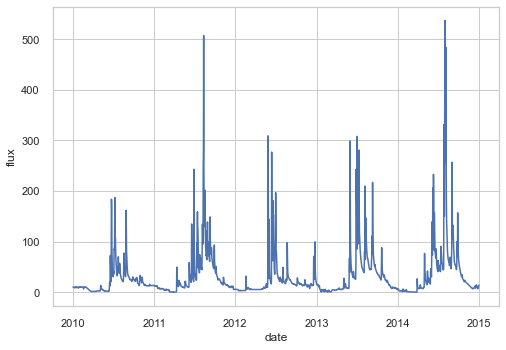

In [33]:
# Test plot_one_timeserie function
plot_one_timeserie(8114001, "flux", "2010-01-01", "2015-01-01")

The chart shows the evolution of flux, precipitation and maximum temperature of a certain basin_id 8114001, through time, constrained by minimum and maximum date from january first of 2010 to january first of 2015

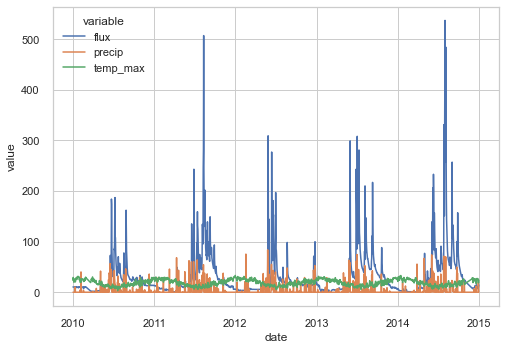

In [34]:
# Test plot_three_timeseries function
plot_three_timeseries(8114001, "2010-01-01", "2015-01-01")

The chart shows the occurrence of extreme events through time, from 1980 to 2020

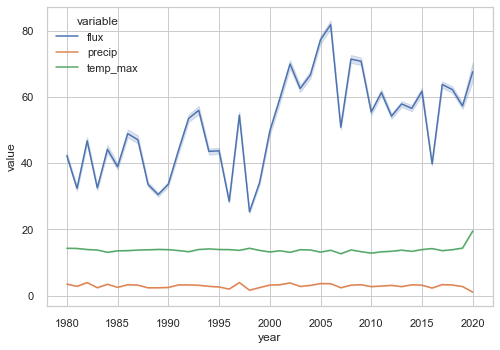

In [35]:
# Test plot_all_timeseries function
plot_all_timeseries()

The chart shows the percentage of extreme events during time, from 1980 to 2020

In [64]:
# Test plot_perc_timeseries function
plot_perc_timeseries()

NameError: name 'plot_perc_timeseries' is not defined

The chart shows  the percentage of extreme events of different regions during time, from 1980 to 2020

In [75]:
# Test plot_all_perc_timeseries function
plot_all_perc_timeseries()

NameError: name 'plot_all_perc_timeseries' is not defined

In [77]:
# Test draw_map_buble_single function
draw_map_buble_single()

In [78]:
# Test draw_map_buble_season function
draw_map_buble_season()

### 05. DATA EXPLORATION

In [ ]:
# Basic statistics of the numeric features
Base_Num.describe()

,flux,precip,temp_max,mean_elev,area_km2
count,4.180480e+06,4.175037e+06,4.175037e+06,4.180480e+06,4.180480e+06
mean,5.253340e+01,2.947445e+00,1.365728e+01,1.760129e+03,2.404876e+03
std,1.676027e+02,8.766749e+00,6.615037e+00,1.382121e+03,4.322051e+03
min,0.000000e+00,0.000000e+00,-1.160359e+01,1.181229e+02,1.789123e+01
25%,8.680000e-01,0.000000e+00,9.162867e+00,5.847012e+02,3.761001e+02
50%,5.171000e+00,0.000000e+00,1.321396e+01,1.195311e+03,8.205541e+02
75%,2.990000e+01,6.422626e-01,1.805745e+01,3.048161e+03,2.461610e+03
max,1.580500e+04,2.132120e+02,4.081117e+01,4.910152e+03,5.224367e+04


In [ ]:
# Basic statistics of the categorical features
Base_Cat.describe(include = np.object)

C:\Users\malud\AppData\Local\Temp/ipykernel_9356/3040675471.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,month,season,gauge_name
count,4180480,4180480,4180480
unique,12,4,503
top,January,Fall,Rio Aconcagua En Chacabuquito
freq,361101,1061050,14670


In [ ]:
Base_Cat.nunique()

year           41
month          12
season          4
gauge_name    503
dtype: int64

The heatmap shows the correlation between the variables area_km2, mean_elev, temp_max, precip and flux

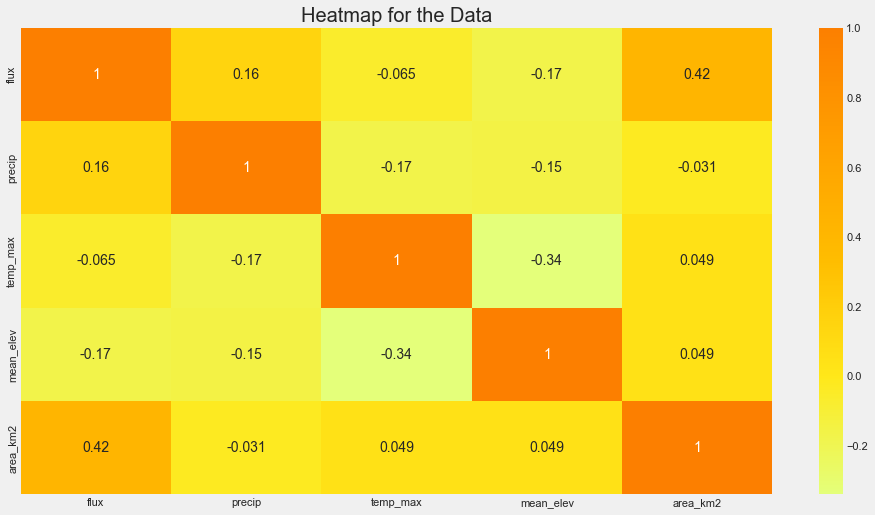

In [ ]:
# Heatmap correlation between numerical features
plt.style.use("fivethirtyeight")                                                                                                            # Load style

plt.rcParams["figure.figsize"] = (15, 8)                                                                                                    # Chart size
sns.heatmap(Base_Num.corr(),                                                                                                                # Heatmap method
            cmap = "Wistia",                                                                                                                # Color editing
            annot = True)                                                                                                                   # Write value on each cell
plt.title("Heatmap for the Data", fontsize = 20)                                                                                            # Title editing
plt.show()                                                                                                                                  # Display 

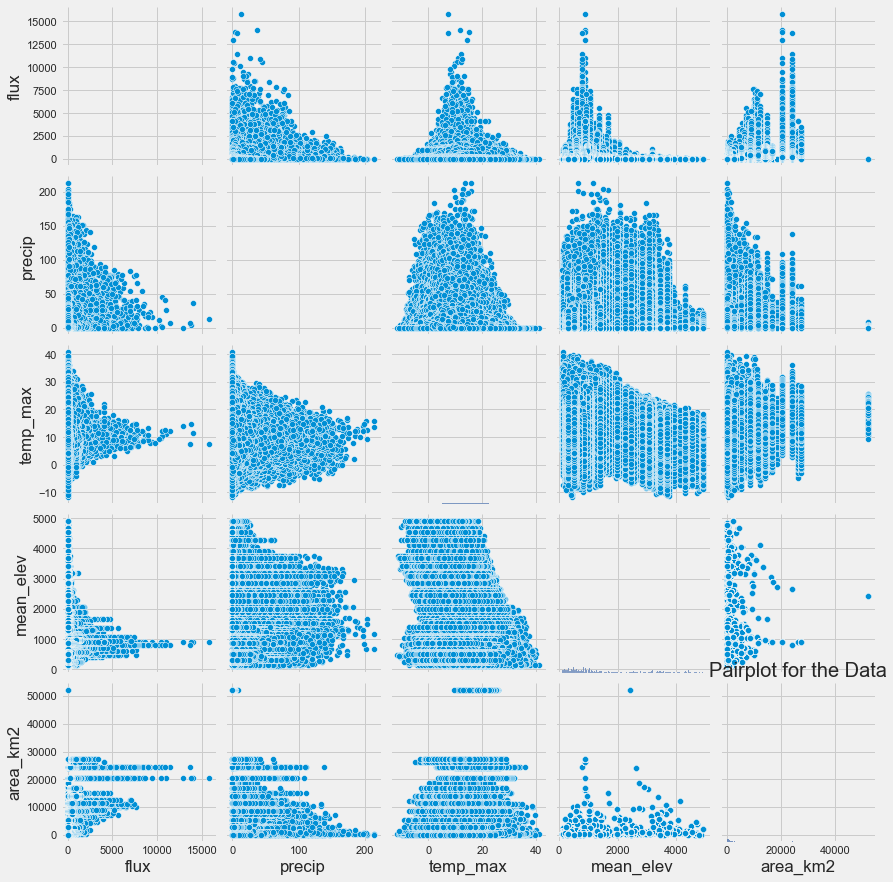

In [ ]:
# Multiple plots of the numerical data
sns.pairplot(Base_Num)
plt.title("Pairplot for the Data",                                                                                                          # Title text
        fontsize = 20)                                                                                                                      # Title font size
plt.show()                                                                                                                                  # Display plot

In [ ]:
# Clock chapter startpoint
start_time = time.monotonic()

In [ ]:
# Basic statistics regarding some of the database columns
Database.describe() 

,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2,year,month_num,temp_max_last1,temp_max_next1,temp_max_mean_1dayrange,flux_extreme_num,precip_extreme_num,temp_extreme_num,flux_extreme,precip_extreme,temp_extreme
count,4.180480e+06,4.180480e+06,4.175037e+06,4.175037e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.175037e+06,4.175036e+06,4.174689e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06
mean,7.179757e+06,5.253340e+01,2.947445e+00,1.365728e+01,-3.569572e+01,-7.129595e+01,1.760129e+03,2.404876e+03,2.001188e+03,6.498759e+00,2.947445e+00,2.947446e+00,2.947581e+00,2.677356e+02,1.742282e+01,2.277701e+01,4.988470e-02,4.993517e-02,4.993517e-02
std,3.180965e+06,1.676027e+02,8.766749e+00,6.615037e+00,8.047659e+00,1.254339e+00,1.382121e+03,4.322051e+03,1.126510e+01,3.456926e+00,8.766749e+00,8.766750e+00,6.997256e+00,9.670021e+01,8.437583e+00,4.373647e+00,2.177068e-01,2.178111e-01,2.178111e-01
min,1.001001e+06,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01,1.980000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.710000e+02,7.404016e+00,1.608583e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.558001e+06,8.680000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02,1.992000e+03,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.710000e+02,1.367244e+01,2.257138e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.350003e+06,5.171000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02,2.002000e+03,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+02,1.809280e+01,2.415997e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.416001e+06,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03,2.011000e+03,1.000000e+01,6.422626e-01,6.422658e-01,2.469805e+00,3.100000e+02,1.809280e+01,2.415997e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,1.293000e+07,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04,2.020000e+03,1.200000e+01,2.132120e+02,2.132120e+02,1.411044e+02,4.070000e+02,3.050326e+01,2.826048e+01,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

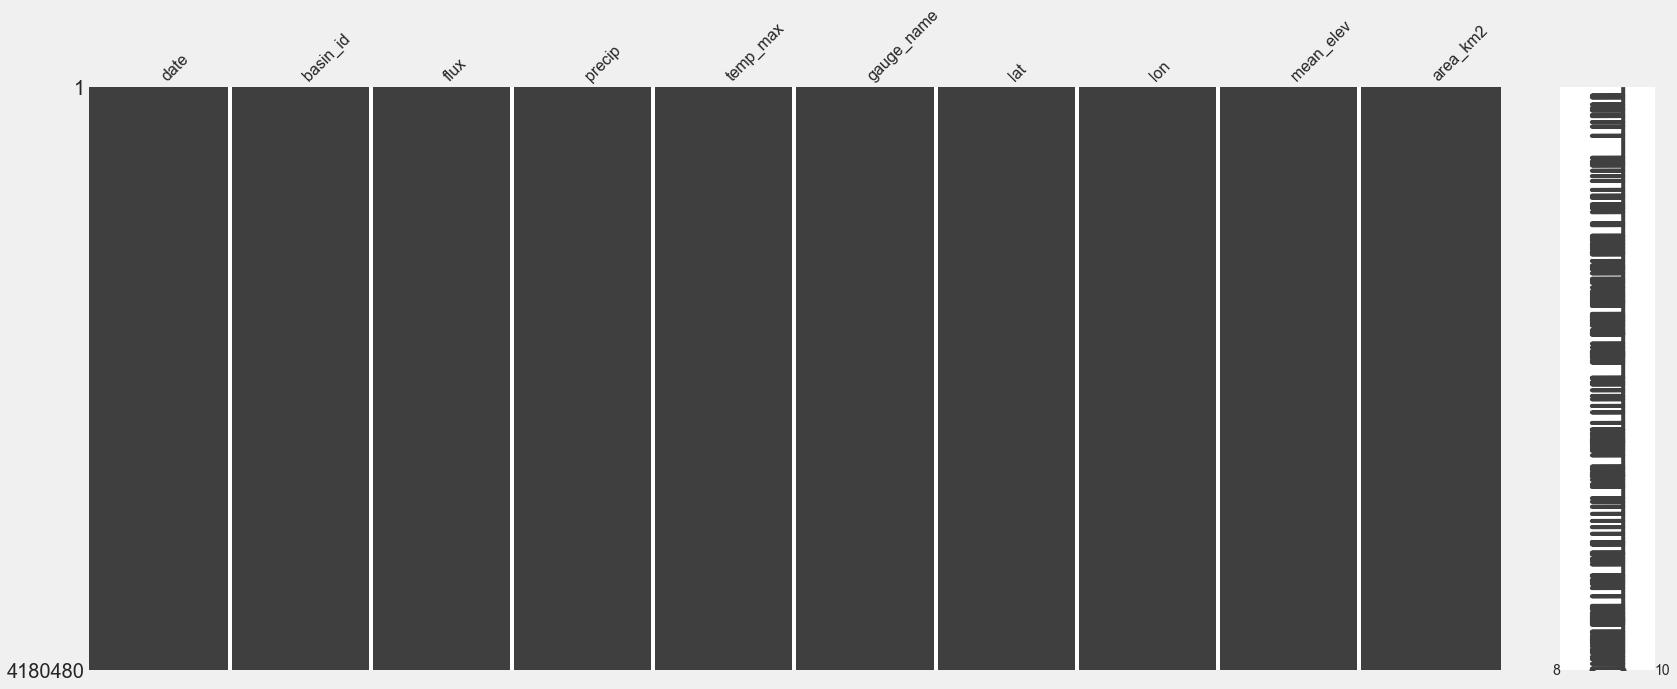

In [ ]:
# Visualize missing data along the database
mn.matrix(base)

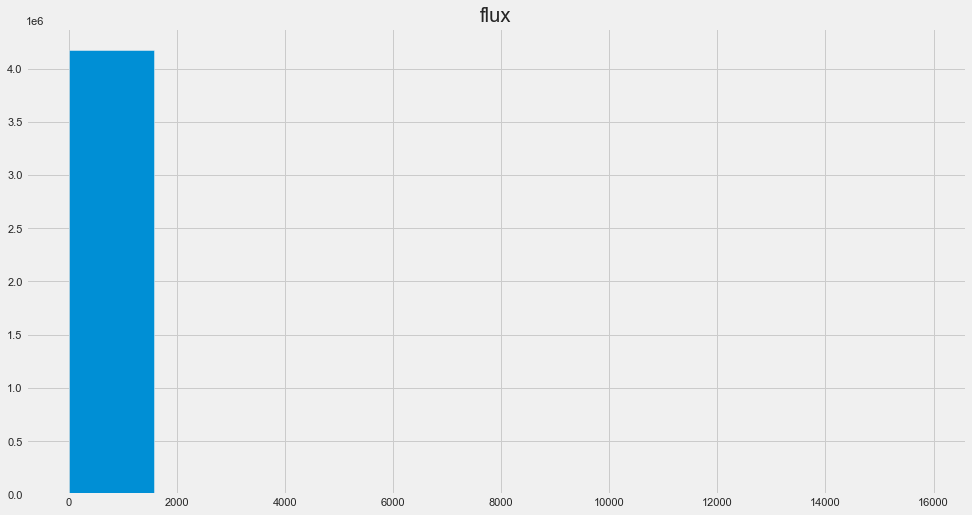

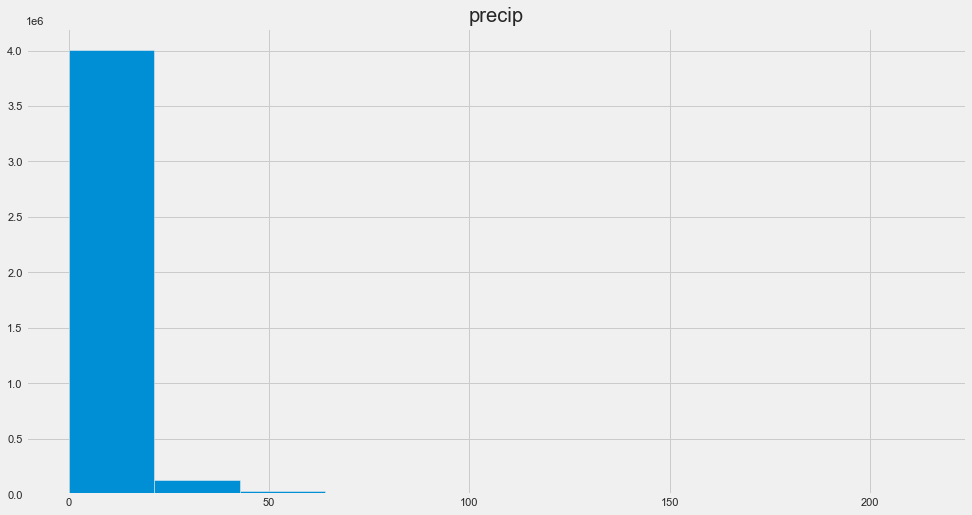

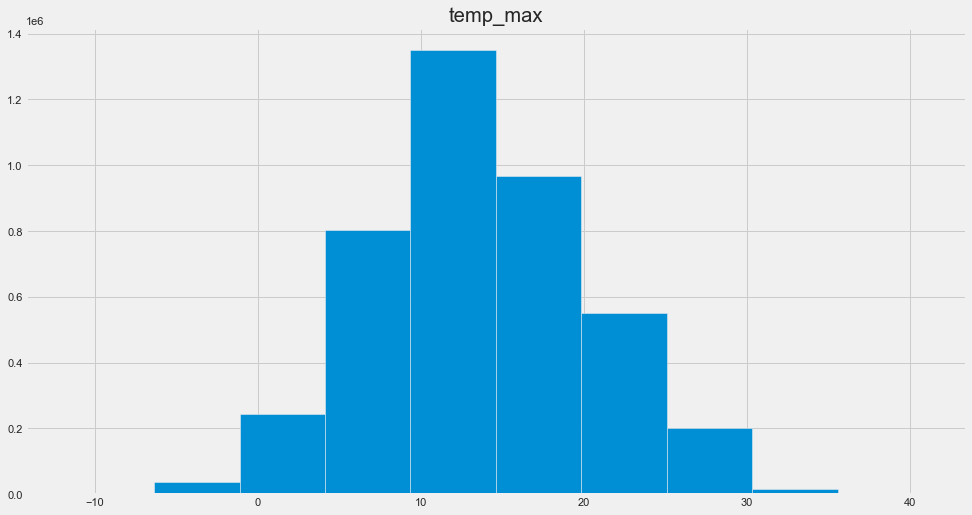

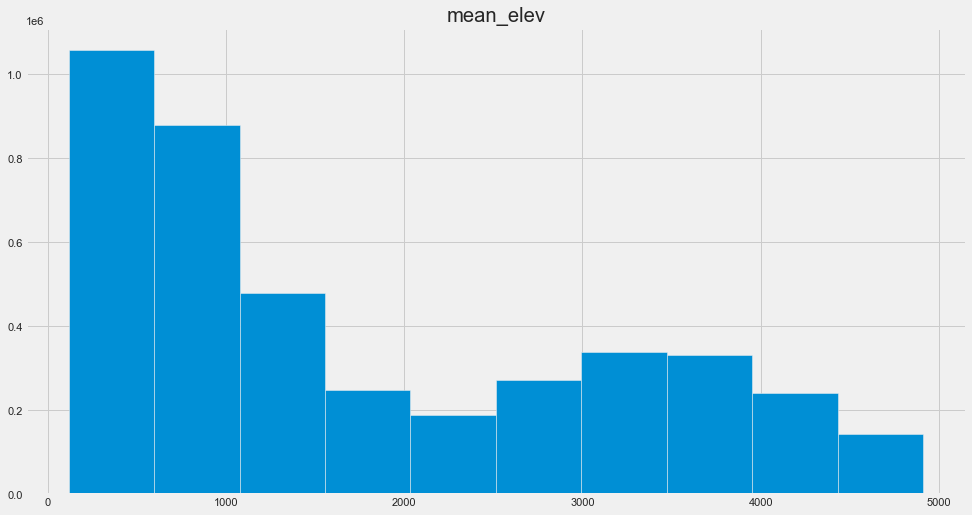

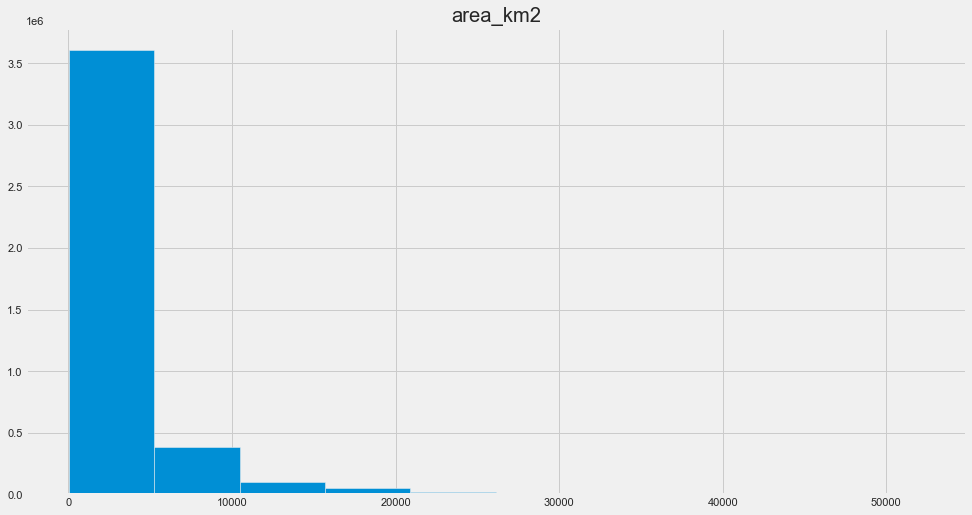

In [ ]:
# Histogram of numerical variables 
for g in Base_Num.columns:
    plt.hist(Base_Num[g])                                                                                                                   # Histogram of numerical variables
    plt.title(g)                                                                                                                            # Title as variable name
    plt.show()                                                                                                                              # DIsplay chart

               flux    precip  temp_max  mean_elev  area_km2
flux       1.000000  0.157168 -0.065097  -0.172195  0.423227
precip     0.157168  1.000000 -0.167713  -0.153925 -0.030863
temp_max  -0.065097 -0.167713  1.000000  -0.339706  0.049079
mean_elev -0.172195 -0.153925 -0.339706   1.000000  0.048762
area_km2   0.423227 -0.030863  0.049079   0.048762  1.000000


<AxesSubplot:>

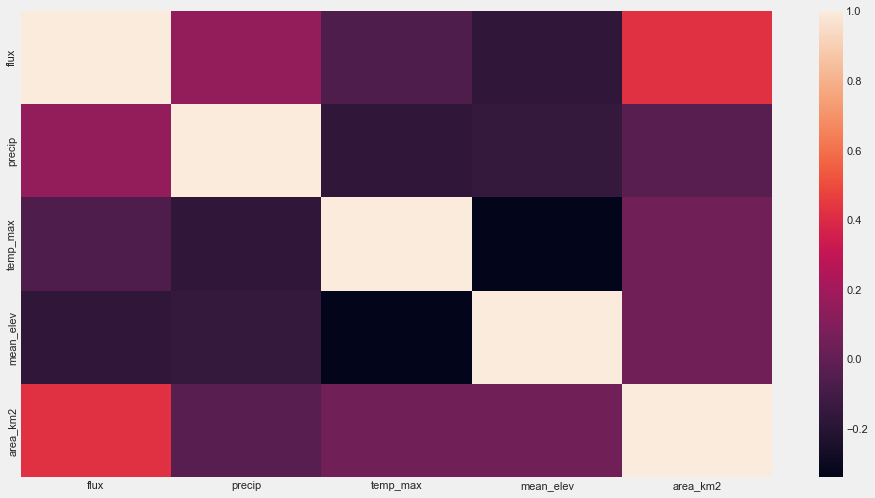

In [ ]:
# Show correlation between numeric variables
print(Base_Num.corr())                                                                                                                      # Correlation table
sns.heatmap(Base_Num.corr())

### 06. Feature Selection

In [65]:
# Clock chapter startpoint
start_time = time.monotonic()

# Split data into train and test databases
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Database, Database.flux_extreme, test_size = 0.2)

# Identify features that need to be encodes before using Random Forest 
Features_Encode = X_Train.columns[X_Train.dtypes == object].tolist()
Features_Encode.remove("gauge_name")     

# Show Features_Encode
Features_Encode

['month', 'season', 'region']

In [66]:
# Transform every feature that needs to be encoded into dummies
X_Train_Encoded = pd.get_dummies(X_Train, prefix = Features_Encode, columns = ["month", "season", "region"])
X_Test_Encoded = pd.get_dummies(X_Test, prefix = Features_Encode, columns = ["month", "season", "region"])

# Show X_Train_Encoded
X_Train_Encoded

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,...,region_ARL,region_Antofagasta,region_Arica y Parinacota,region_Atacama,region_Aysen,region_Coquimbo,region_MNB,region_Magallanes,region_Tarapaca,region_VRB
427138,2019-05-22,3022001,0.606,0.002729,0.493778,Rio La Ola En Vertedero,-26.4808,-69.0600,4119.543621,12310.980090,...,0,1,0,0,0,0,0,0,0,0
2343857,1987-09-17,8123001,55.500,0.000000,12.292616,Rio Itata En Cholguan,-37.1500,-72.0667,833.666266,860.055656,...,0,0,0,0,0,0,1,0,0,0
2982368,1989-02-13,9127001,3.190,0.000000,32.970622,Rio Muco En Puente Muco,-38.6167,-72.4167,536.673360,650.260519,...,0,0,0,0,0,0,1,0,0,0
3813644,2013-05-02,11542001,1001.000,1.096712,8.434474,Rio Baker En Colonia,-47.3500,-72.8500,897.938710,26215.139877,...,0,0,0,0,1,0,0,0,0,0
3073249,1981-07-07,9404001,180.000,24.610077,12.859314,Rio Allipen En Los Laureles,-38.9833,-72.2333,1020.638447,1675.108271,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973277,2008-10-22,4530001,5.540,0.000000,14.744630,Rio Cogoti En Fraguita,-31.1119,-70.8850,2601.357338,490.517092,...,0,0,0,1,0,0,0,0,0,0
706636,2009-05-24,4301002,1.190,0.000000,7.703777,Rio La Laguna En Salida Embalse La Laguna,-30.2028,-70.0361,4274.626964,557.962439,...,0,0,0,1,0,0,0,0,0,0
946653,2010-09-22,4522002,0.070,0.000000,7.771761,Rio Rapel En Junta,-30.7081,-70.8728,2661.316140,820.554116,...,0,0,0,1,0,0,0,0,0,0
3143655,1997-03-05,9420001,92.400,0.000000,23.904597,Rio Tolten En Villarica,-39.2667,-72.2333,964.399411,2933.647096,...,1,0,0,0,0,0,0,0,0,0


In [67]:
# Remove Date and Collected (target variable) as possible variables of the model
X_Train_Encoded = (X_Train_Encoded >> 
                    select(~X.temp_extreme_high_num,                                                                                        # 95 percentile treshold of max temp don't help its prediction
                        ~X.precip_extreme_high_num,                                                                                         # 95 percentile treshold of precip don't help its prediction
                        ~X.flux_extreme_high_num,                                                                                           # 95 percentile treshold of flux don't help its prediction
                        ~X.precip_extreme_low_num,                                                                                          # 05 percentile treshold of precip don't help its prediction
                        ~X.flux_extreme_low_num,                                                                                            # 05 percentile treshold of flux don't help its prediction
                        ~X.temp_extreme_low_num,                                                                                            # 05 percentile treshold of max temp don't help its prediction
                        ~X.temp_extreme,                                                                                                    # Future data will not be available for prediction
                        ~X.precip_extreme,                                                                                                  # Future data will not be available for prediction
                        ~X.flux_extreme,                                                                                                    # Future data will not be available for prediction
                        ~X.temp_max_mean_1dayrange,                                                                                         # Future data necessary to build this feature
                        ~X.temp_max_next1,                                                                                                  # Future data necessary to build this feature
                        ~X.temp_max_last1,                                                                                                  # Current day data will not be available for prediction 
                        ~X.month_num,                                                                                                       # Month already present as dummy
                        ~X.date,                                                                                                            # Date unecessary for this moment
                        ~X.gauge_name,                                                                                                      # Too many to have relevant predictive power as categorical feature (dummy)
                        ~X.flux,                                                                                                            # Future data will not be available for prediction
                        ~X.precip,                                                                                                          # Future data will not be available for prediction
                        ~X.temp_max,                                                                                                        # Future data will not be available for prediction
                        ~X.basin_id))                                                                                                       # Too many to have relevant predictive power as categorical feature (dummy)

# The same for Test database
X_Test_Encoded = (X_Test_Encoded >> 
                    select(~X.temp_extreme_high_num,                                                                                        # 95 percentile treshold of max temp don't help its prediction 
                        ~X.precip_extreme_high_num,                                                                                         # 95 percentile treshold of precip don't help its prediction 
                        ~X.flux_extreme_high_num,                                                                                           # 95 percentile treshold of flux don't help its prediction 
                        ~X.precip_extreme_low_num,                                                                                          # 05 percentile treshold of precip don't help its prediction
                        ~X.flux_extreme_low_num,                                                                                            # 05 percentile treshold of flux don't help its prediction
                        ~X.temp_extreme_low_num,                                                                                            # 05 percentile treshold of max temp don't help its prediction
                        ~X.temp_extreme,                                                                                                    # Future data will not be available for prediction
                        ~X.precip_extreme,                                                                                                  # Future data will not be available for prediction
                        ~X.flux_extreme,                                                                                                    # Future data will not be available for prediction
                        ~X.temp_max_mean_1dayrange,                                                                                         # Future data necessary to build this feature
                        ~X.temp_max_next1,                                                                                                  # Future data necessary to build this feature
                        ~X.temp_max_last1,                                                                                                  # Current day data will not be available for prediction
                        ~X.month_num,                                                                                                       # Month already present as dummy
                        ~X.date,                                                                                                            # Date unecessary for this moment
                        ~X.gauge_name,                                                                                                      # Too many to have relevant predictive power as categorical feature (dummy)
                        ~X.flux,                                                                                                            # Future data will not be available for prediction
                        ~X.precip,                                                                                                          # Future data will not be available for prediction
                        ~X.temp_max,                                                                                                        # Future data will not be available for prediction
                        ~X.basin_id))                                                                                                       # Too many to have relevant predictive power as categorical feature (dummy)

In [68]:
# Random Forest Options to help select best features for the model
Rf_Select = SelectFromModel(
                RandomForestClassifier(
                    min_samples_leaf = 50,                                                                                                  # Minimum sample sizes
                    n_estimators = 150,                                                                                                     # Choose quantity of estimators (150 should be enough for feature selection)
                    bootstrap = True,                                                                                                       # Allow Bootstrap procedeer
                    oob_score = True,                                                                                                       # Allow Out of Bag score to take data not utilized in Decision Tree to evaluate Forest precision
                    n_jobs = -1,                                                                                                            # Number of jos to run in parallel (-1 indicates all processors)
                    random_state = 123,                                                                                                     # Use a seed called 123 for replicabiliy
                    max_depth = 5,                                                                                                          # Maximum depth of the tree
                    max_features = 6))                                                                                                      # Limit number of selected features

In [69]:
# Run Random Forest with the already encoded train database
Rf_Select.fit(X_Train_Encoded, Y_Train)

# True or false array that shows which features were selected
Rf_Select.get_support()

# Translation of which features were selected to the model
Selected_Feat = X_Train_Encoded.columns[(Rf_Select.get_support())]

# Show Selected_Feat
print(Selected_Feat)

# Number of features selected - I would change if it get less than 3 or more than 6)
print("--------------------------------------------")
print(f"{len(Selected_Feat)} features were selected")
print("--------------------------------------------")

# Ends this chapter
end_time = time.monotonic()
print("06. Feature Selection | OK")
print(f"Duration: {timedelta(seconds = end_time - start_time)}")
print(" ")

Index(['mean_elev', 'area_km2', 'flux_lag2', 'flux_extreme_lag2'], dtype='object')
--------------------------------------------
4 features were selected
--------------------------------------------
06. Feature Selection | OK
Duration: 0:04:42.500000
 


### 07. Model

In [70]:
# Clock chapter startpoint
start_time = time.monotonic()

# Build a Dataframe with selected features and target variable
Train = (X_Train_Encoded >> 
            select(Selected_Feat) >>                                                                                                        # Remove any feature not included in the feature selection
            mutate(Index = X.index) >>                                                                                                      # Create an auxiliary column that copy the index
            bind_cols(Y_Train) >>                                                                                                           # Insert the target variable to the complete train dataset
            select(~X.Index))                                                                                                               # Remove Index auxiliary column

# Do the same to test sample, except it does not receive the target variable
Test = (X_Test_Encoded >> 
            select(Selected_Feat) >>                                                                                                        # Remove any feature not included in the feature selection
            mutate(Index = X.index) >>                                                                                                      # Create an auxiliary column that copy the index
            bind_cols(Y_Test)  >>                                                                                                           # Insert the target variable to the complete test dataset
            select(~X.Index))                                                                                                               # Remove Index auxiliary column

# Show Train
Train

,mean_elev,area_km2,flux_lag2,flux_extreme_lag2,flux_extreme
427138,4119.543621,12310.980090,0.647,0.0,0
2343857,833.666266,860.055656,60.200,0.0,0
2982368,536.673360,650.260519,3.200,0.0,0
3813644,897.938710,26215.139877,1106.000,1.0,1
3073249,1020.638447,1675.108271,202.000,0.0,0
...,...,...,...,...,...
973277,2601.357338,490.517092,7.110,0.0,0
706636,4274.626964,557.962439,0.855,0.0,0
946653,2661.316140,820.554116,0.078,1.0,1
3143655,964.399411,2933.647096,74.400,0.0,0


In [71]:
# Nominate which variables are numeric and which are categorical
Base_Num_Cols = Train.columns[Train.dtypes == "float64"].tolist()                                                                           # Make a list of columns names with numeric like type
Base_Cat_Cols = Train.columns[Train.dtypes == "uint8"].tolist()                                                                             # Make a list of columns names with categorical like type

# Show Base_Num_Cols
Base_Num_Cols

['mean_elev', 'area_km2', 'flux_lag2', 'flux_extreme_lag2']

In [72]:
## The modelling strategy will be the following...
## Pycaret will run 12 models, with feature interaction of the features already selected with the train-test split already determined
## No ordinal features were identified
## Categorical and Numerical festures are explicit in the model
## K-fold number seleted rational was to balance variance and bias (and to be honest computational time was also taken into consideration)
## Pycaret will choose the best 3 models and create a hybrid model blending the top 3 models by soft voting
# Options to run caret (don't forget to press ENTER, when it asks to do so)
clf1 = setup(data = Train,                                                                                                                  # Use Train database as data input for pycaret
            target = "flux_extreme",                                                                                                        # Determine "flux_extreme" as the target variable
            categorical_features = Base_Cat_Cols,                                                                                           # Set which variables are categorical
            numeric_features = Base_Num_Cols,                                                                                               # Explicit which features are numeric
            test_data = Test,                                                                                                               # Insert Test database for cross-validation
            verbose = True,                                                                                                                 # Progress bar that shows how long it will take to finish the setup task
            fix_imbalance = False,                                                                                                          # Unfortunally, I was unable to turn fix imbalance on, because it not only took 80x more per model, but also could not do many models
            remove_outliers = False,                                                                                                        # Don't remove outliers from the set
            normalize = True,                                                                                                               # Standardize features so that every variable have the same weight
            feature_interaction = True,                                                                                                     # Interaction of features
            fold_strategy = "kfold",                                                                                                        # Cross validation strategy
            fold = 5,                                                                                                                       # Number of folds to be used in cross validation
            feature_selection = False,                                                                                                      # Relevant features for the model were already selected, therefore there is no need to do it again
            remove_multicollinearity = False)                                                                                               # Not able to remove multicolinearity from variables


,Description,Value
0,session_id,3640
1,Target,flux_extreme
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3340029, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [73]:
# List of models that are suitable for this kind of prediction
Models_List = ["nb",                                                                                                                        # Naive Bayes
                "dt",                                                                                                                       # Decision Tree Classifier
                "rf",                                                                                                                       # Random Forest Classifier
                "lr",                                                                                                                       # Logistic Regression
                "lda",                                                                                                                      # Linear Discriminant Analysis
                "gbc",                                                                                                                      # Gradient Boosting Classifier
                "lightgbm",                                                                                                                 # Light Gradient Boosting
                "ada",                                                                                                                      # Ada Boost Classifier
                "ridge",                                                                                                                    # Ridge Classifier
                "et",                                                                                                                       # Extra Trees Classifier
                "qda",                                                                                                                      # Quadratic Discriminant Analysis
                "svm"]                                                                                                                      # SVM - Linear Kernel

In [74]:
## If I had time to run a hybrid model I would probably define n as 3
n_models = 1

# Highlight models with best performance by comparing with most used metrics
Best_Models = compare_models(include = Models_List,                                                                                         # Compare models of the list considered suitable for the problem
                            n_select = n_models,                                                                                            # Select top n models
                            sort = "auc")                                                                                                   # Select metric to choose top n models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9840,0.9932,0.9105,0.9279,0.9191,0.9103,0.9103,9.6640
gbc,Gradient Boosting Classifier,0.9839,0.9917,0.9130,0.9241,0.9185,0.9096,0.9096,180.5060
ada,Ada Boost Classifier,0.9835,0.9913,0.9170,0.9177,0.9173,0.9082,0.9082,42.3140
rf,Random Forest Classifier,0.9824,0.9813,0.8979,0.9230,0.9102,0.9005,0.9006,197.2020
lr,Logistic Regression,0.9835,0.9770,0.9174,0.9173,0.9173,0.9082,0.9082,3.0240
nb,Naive Bayes,0.9788,0.9758,0.9273,0.8684,0.8969,0.8851,0.8857,1.8040
lda,Linear Discriminant Analysis,0.9836,0.9752,0.9173,0.9176,0.9174,0.9083,0.9083,2.4800
et,Extra Trees Classifier,0.9821,0.9729,0.8905,0.9270,0.9084,0.8985,0.8987,75.6340
qda,Quadratic Discriminant Analysis,0.6262,0.9711,0.9527,0.5567,0.6065,0.5266,0.5270,1.5820
dt,Decision Tree Classifier,0.9818,0.9674,0.8887,0.9259,0.9069,0.8969,0.8971,9.2180


If I had time or a fast machine to run a hybrid model I would run this code to blend soft voting the best 3 models

In [ ]:
# # If I had time to run a hybrid model I would probably define n as 3
# n_models = 3

# # Highlight models with best performance by comparing with most used metrics
# Best_Models = compare_models(include = Models_List,                                                                                         # Compare models of the list considered suitable for the problem
#                             n_select = n_models,                                                                                            # Select top n models
#                             sort = "auc")            

# Tune Selected models
# Tuned_Best_Models = [tune_model(i) for i in Best_Models]                                                                                  # Tune each model (i) of the top model list (Best_Models)

# Blend a hybrid model of the top models by Soft Voting their results to classify the target variable
# Final_Model = blend_models(Tuned_Best_Models)


In [76]:
# Show the best hiperparameter for each of the top models
print(Best_Models)

# Tune best model
Final_Model = tune_model(Best_Models)

# Show the hiperparameters of the blended model
print(Final_Model) 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.9929,0.9132,0.9262,0.9197,0.9108,0.9109
1,0.9838,0.9925,0.9098,0.9266,0.9182,0.9092,0.9092
2,0.9842,0.9930,0.9125,0.9264,0.9194,0.9106,0.9107
3,0.9839,0.9926,0.9123,0.9249,0.9186,0.9096,0.9096
4,0.9839,0.9925,0.9113,0.9266,0.9189,0.9100,0.9101
Mean,0.9840,0.9927,0.9118,0.9261,0.9189,0.9100,0.9101
Std,0.0001,0.0002,0.0012,0.0006,0.0005,0.0006,0.0006


LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=51, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=290, n_jobs=-1, num_leaves=6, objective=None,
               random_state=3640, reg_alpha=0.2, reg_lambda=0.15, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [79]:
# This function output a dashboard with 20 charts regarding models performance                                                              # Feel free to explore the charts to evaluate the model
evaluate_model(Final_Model)                                                                                                                 # Four charts that are in this dashboard will be highlighted next

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

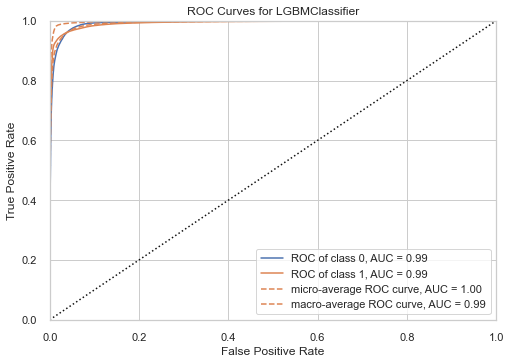

In [80]:
# Show the evolution of the Area Under the Curve (AUC), in other words measure True Positives and True Negatives through the model
plot_model(Final_Model, plot = "auc")                                                                                                       # AUC is a metric product from ROC curve (Receiver Operating Characteristic)

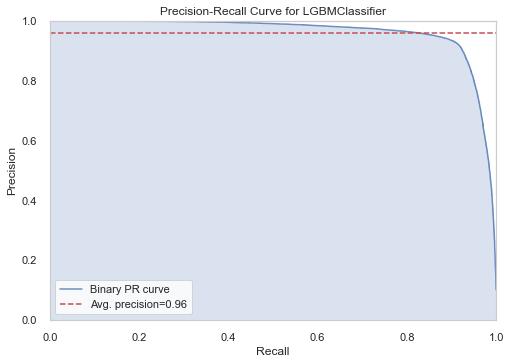

In [81]:
# Plot Precision-Recall chart
plot_model(Final_Model, plot = "pr")                                                                                                        # Shows the tradeoff between precision and recall for different threshold

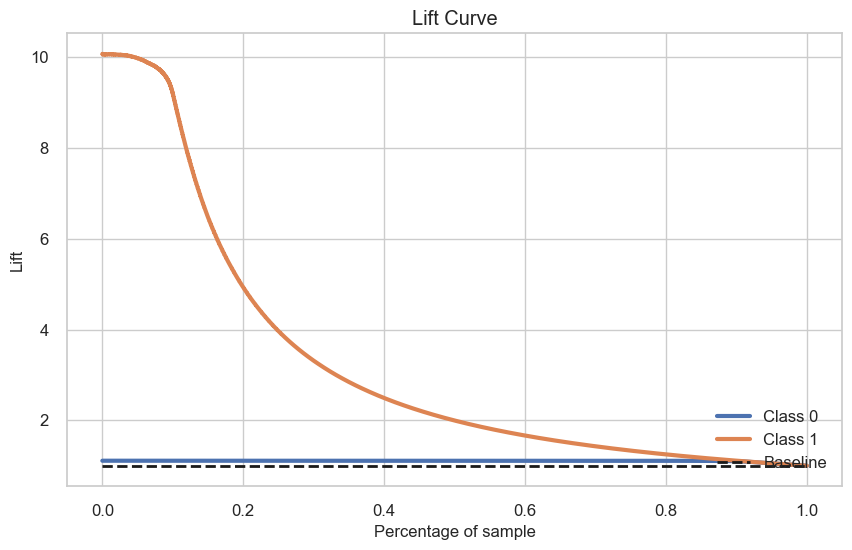

In [82]:
# Plot Lift Curve that compare the potential of the model to find True Positives and True Negatives compared to a random prediction
plot_model(Final_Model, plot = "lift")                                                                                                      # Measure of the model's performance in comparison to a random classifier

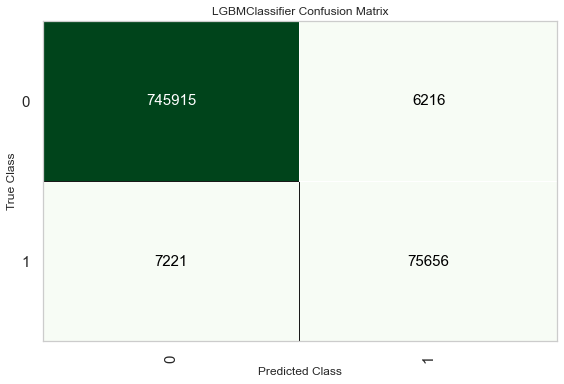

In [83]:
# Confusion Matrix shows False Negatives, False Positives and corect predictions of the model
plot_model(Final_Model, plot = "confusion_matrix")                                                                                          # Quantity of True Positives, False Negatives, False Positives and False Negatives

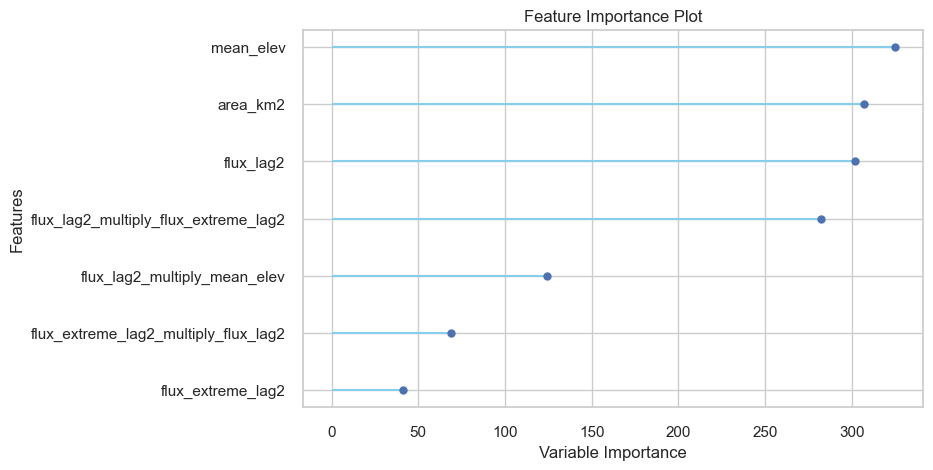

In [84]:
# Plot Feature Importance chart of the best model
plot_model(Final_Model, plot = "feature")                                                                                          

In [85]:
# Predict collection in the test database and show metrics of how accurate the model is
Prediction = predict_model(Final_Model,
                            data = Test)

# Show Prediction
Prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9839,0.9927,0.9129,0.9241,0.9184,0.9095,0.9095


,mean_elev,area_km2,flux_lag2,flux_extreme_lag2,flux_extreme,Label,Score
3671295,1231.970448,105.083538,5.200,0.0,0,0,0.9996
2059448,293.884007,404.250605,0.230,0.0,0,0,0.9964
3569858,1063.256478,1105.642652,2.380,0.0,0,0,0.9993
3039737,505.987226,1665.556771,31.700,0.0,0,0,0.9989
77702,4322.158322,654.506002,0.589,0.0,0,0,0.9991
...,...,...,...,...,...,...,...
2257433,1682.948547,606.704580,69.800,0.0,0,0,0.9951
431598,4757.136453,86.030674,0.031,1.0,1,1,0.9411
3264633,281.881918,1802.603753,26.800,0.0,0,0,0.9989
1116725,2141.647396,3759.924664,9.640,0.0,0,0,0.9992


In [86]:
# Will help transform prediction to the submition format
Y_Test_aux = (Test >>
                mutate(Index = X.index,                                                                                                     # Create aux column for merging databases
                    Actual = X.flux_extreme) >>                                                                                                # Rename target variable to avoid conflict when merging databases
                select(X.Index, X.Actual))                                                                                                  # Select only Index and the target variable

# Transform prediction to the submition format
Prediction_to_Actual = (Prediction >>
                        mutate(Index = X.index) >>                                                                                          # Create aux column for merging databases
                        left_join(Y_Test_aux,                                                                                               # Merge with the target variable
                            by = "Index") >>                                                                                                # Use index to join databases
                        select(~X.Index, ~X.flux_extreme))                                                                                  # Remove Index column

# Ends this chapter
end_time = time.monotonic()
print("07. Model | OK")
print(f"Duration: {timedelta(seconds = end_time - start_time)}")
print(" ")


07. Model | OK
Duration: 1:07:54.968000
 


In [95]:
Prediction_to_Actual

,mean_elev,area_km2,flux_lag2,flux_extreme_lag2,Label,Score,Actual
0,1231.970448,105.083538,5.200,0.0,0,0.9996,0
1,293.884007,404.250605,0.230,0.0,0,0.9964,0
2,1063.256478,1105.642652,2.380,0.0,0,0.9993,0
3,505.987226,1665.556771,31.700,0.0,0,0.9989,0
4,4322.158322,654.506002,0.589,0.0,0,0.9991,0
...,...,...,...,...,...,...,...
835003,1682.948547,606.704580,69.800,0.0,0,0.9951,0
835004,4757.136453,86.030674,0.031,1.0,1,0.9411,1
835005,281.881918,1802.603753,26.800,0.0,0,0.9989,0
835006,2141.647396,3759.924664,9.640,0.0,0,0.9992,0


### 08. SAVE FILE

In [98]:
# Save Prediction to submit
Prediction_to_Actual.to_csv(Result_File)                                                                                                    # Save Prediction file
Prediction_to_Actual.to_csv(Result_Copy)                                                                                                    # ...and a safe copy | "The only thing predictable about life is its unpredictability" - Remy, Ratatouille (2007)
Prediction_to_Actual.to_parquet(Result_File)

# Ends this chapter
End_Time = time.monotonic()
print("Code Ending")
print(f"Duration: {timedelta(seconds = End_Time - Start_Time)}")
print(" ")

Code Ending
Duration: 2:10:32.109000
 
